# **Project :- Customer_Churn_Prediction_Script**

# Outline

1.   **Business Understanding**: Explain the importance of customer churn prediction
2.   **Data Understanding**: Provide an explanation of the dataset used, data sources, and features.
3. **Data Pre-Processing**: Perform initial data inspection as an overview of the data to be used, perform initial data cleaning, divide the data into train-test data and train-validation-test data for modeling purposes, check for missing values and duplicate data.
4. **Exploratory Data Analysis**: Perform visualization and analysis of the dataset.
5. **Feature Analysis**: Looking at the correlation between features
6. **Modeling**: Build several Machine Learning baseline models for customer churn prediction & measure their performance.
7. **Modeling with Oversampling**: Building Machine Learning models using oversampling method (SMOTE).
8. **Key Insight & Recommendation**: Key insights and results of Machine Learning modeling for customer churn prediction and recommendations for actions that can be taken to reduce and prevent customer churn.

# Business Understanding

Retaining customers is important for companies in various industries. Various efforts are made by companies to retain customers to keep using the service. To do this, companies study what factors cause customers to stop using services. This is followed by steps that are considered effective to reduce and even prevent customers from stopping using the products or services offered.

In this final project, data scientists are expected to study the characteristics of customers who stop using the service and build machine learning models, predict whether a customer will stop or continue to use the company's services and provide recommended actions to minimize or even prevent the possibility of losing customers.

#Data Understanding

The data used in this final project is **Customer Churn Dataset** from kaggle.

Dataset link: [https://www.kaggle.com/datasets/muhammadshahidazeem/customer-churn-dataset/data?select=customer_churn_dataset-training-master.csv](https://www.kaggle.com/datasets/muhammadshahidazeem/customer-churn-dataset/data?select=customer_churn_dataset-training-master.csv)

Overall, the dataset consists of 505,256 rows of data. Each row of data refers to a customer profile. The dataset consists of 12 features, namely:
1. `CustomerID`: Id code for customer identification
2.  `Age` : Age of the customer (in years)
3. `Gender` : Customer's gender (Male/Female)
4. `Tenure` : The period of time the customer uses the service (in months)
5. `Usage Frequency`: The frequency with which the customer uses the service (in months)
6. `Support Calls`: Frequency of customer calls to customer service
7. `Payment Delay`: The period of delay in payment of service bills by customers (in months)
8. `Subscription Type`: The type of service selected by the customer (Basic/Standard/Premium)
9. `Contract Length`: The contract period of the service selected by the customer (Monthly/Quarterly/Annual)
10. `Total Spend`: Total money spent by the customer on the service (in USD)
11. `Last Interaction`: The period of time from the customer's last usage to the present (in months)
12. `Churn`: The current status of the customer, continuing service (0) or quitting (1).

This dataset consists of two parts, namely training data (440,882 rows of data) and testing data (64,374 rows of data). For the purpose of analysis and building machine learning models, the training data will be used. Meanwhile, to evaluate the performance of the machine learning model, the testing data will be used.

For the Machine Learning model, the target feature is the `Churn` feature. Other features can be used as predictor features.

# Data Pre-Processing

In [8]:
#import packages will be used

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [9]:
#load data training dan testing

train = pd.read_csv("customer_churn_dataset-training-master.csv")
test = pd.read_csv("customer_churn_dataset-testing-master.csv")

In [10]:
#inspect data training

train.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [11]:
#inspect data testing

test.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [12]:
#checking duplicates

train.duplicated().sum()

0

In [13]:
test.duplicated().sum()

0

In [14]:
#checking missing values
train[train.isnull().any(axis=1)]

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
199295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
test[test.isnull().any(axis=1)]

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn


In [16]:
#removing missing values
train = train.drop(index=199295, axis=0).reset_index()

In [17]:
train = train.drop(columns=['index'])

In [18]:
train[train.isnull().any(axis=1)]

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn


In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440832 entries, 0 to 440831
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [20]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


There is no duplicate data. In the training data, there is one data row where all features are null and the row is deleted. So there are no more missing values in the training & testing data.

#Exploratory Data Analysis

In [23]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,440832.0,225398.667955,129531.918550,2.0,113621.75,226125.5,337739.25,449999.0
Age,440832.0,39.373153,12.442369,18.0,29.00,39.0,48.00,65.0
Tenure,440832.0,31.256336,17.255727,1.0,16.00,32.0,46.00,60.0
Usage Frequency,440832.0,15.807494,8.586242,1.0,9.00,16.0,23.00,30.0
Support Calls,440832.0,3.604437,3.070218,0.0,1.00,3.0,6.00,10.0
Payment Delay,440832.0,12.965722,8.258063,0.0,6.00,12.0,19.00,30.0
Total Spend,440832.0,631.616223,240.803001,100.0,480.00,661.0,830.00,1000.0
Last Interaction,440832.0,14.480868,8.596208,1.0,7.00,14.0,22.00,30.0
Churn,440832.0,0.567107,0.495477,0.0,0.00,1.0,1.00,1.0


In [24]:
train.describe(include=['O']).T

,count,unique,top,freq
Gender,440832,2,Male,250252
Subscription Type,440832,3,Standard,149128
Contract Length,440832,3,Annual,177198


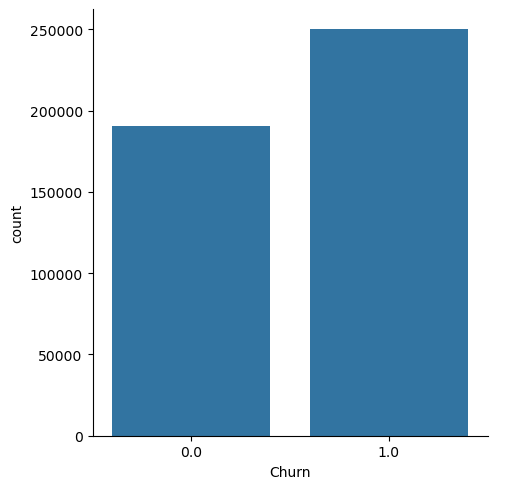

In [25]:
#Churn
sns.catplot(data=train, x="Churn", kind="count")

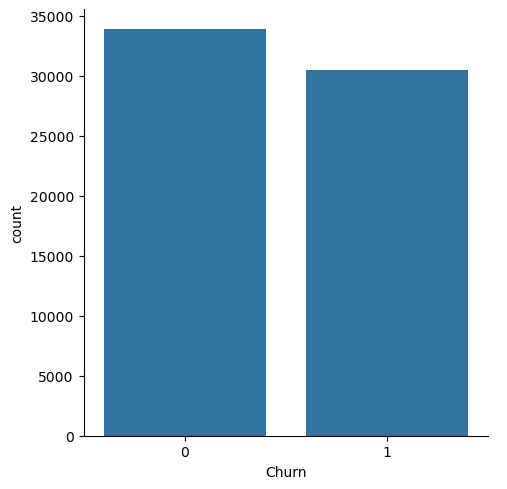

In [26]:
#Churn
sns.catplot(data=test, x="Churn", kind="count")

It can be seen that in this data, there are more people who stop using the service than people who continue to use the service.

<Axes: xlabel='Churn', ylabel='Age'>

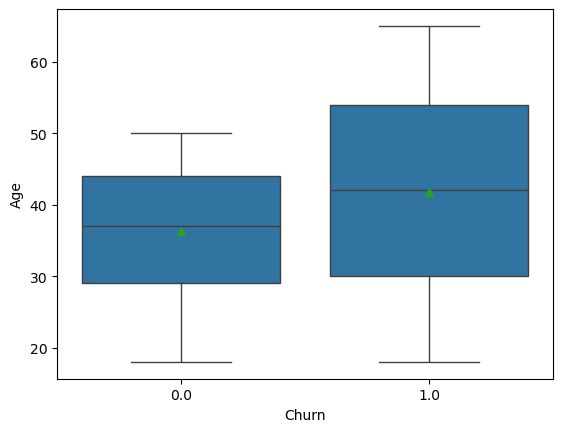

In [28]:
#kolom Age
column = 'Age'
sns.boxplot(x='Churn', y=column, data=train, showmeans=True)

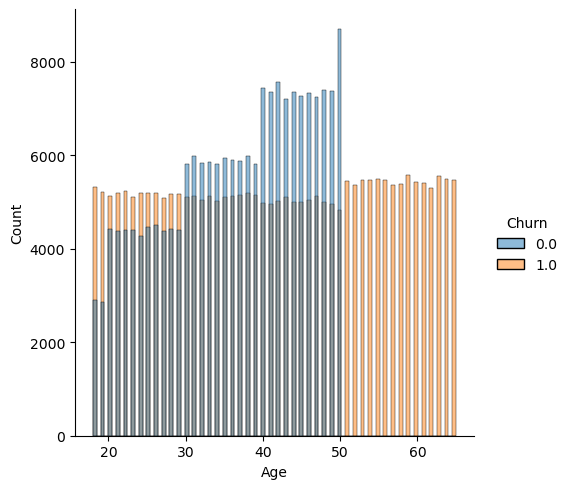

In [29]:
sns.displot(data=train, x=column, hue='Churn', common_norm=False, fill=True)

* The average age of people who stopped using the service was higher than people who continued using the service
* The distribution of people who stopped using the service was spread fairly evenly across various age groups. While people who continue to use the service are mostly around the age of 40-50 years.

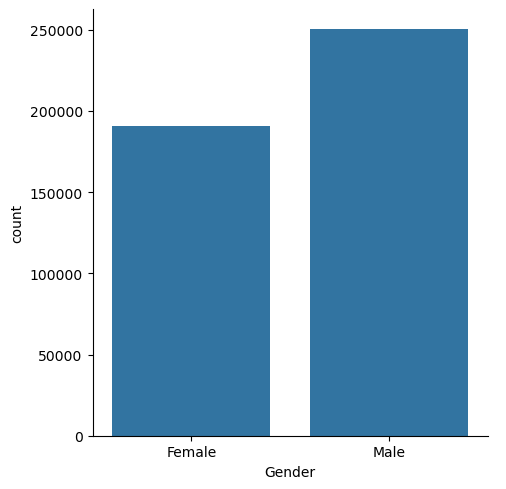

In [31]:
#kolom Gender
sns.catplot(data=train, x="Gender", kind="count")

<Axes: xlabel='Churn', ylabel='Tenure'>

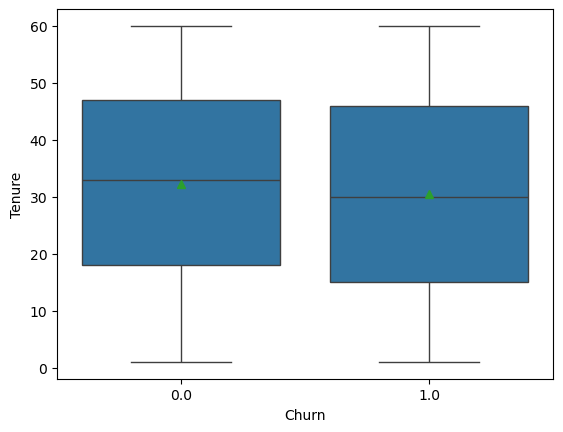

In [32]:
#kolom Tenure
column = 'Tenure'
sns.boxplot(x='Churn', y=column, data=train, showmeans=True)

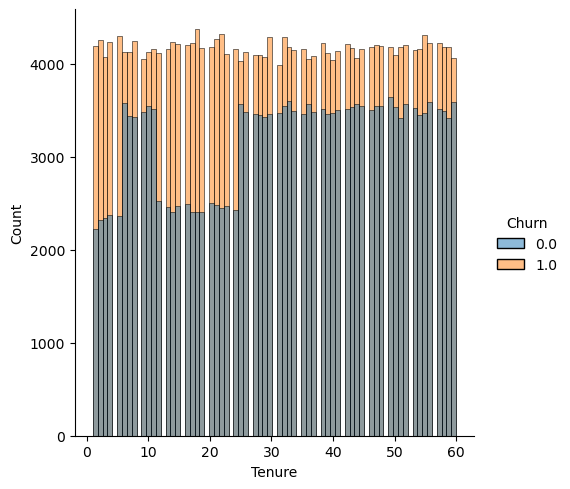

In [33]:
sns.displot(data=train, x=column, hue='Churn', common_norm=False, fill=True)

<Axes: xlabel='Churn', ylabel='Usage Frequency'>

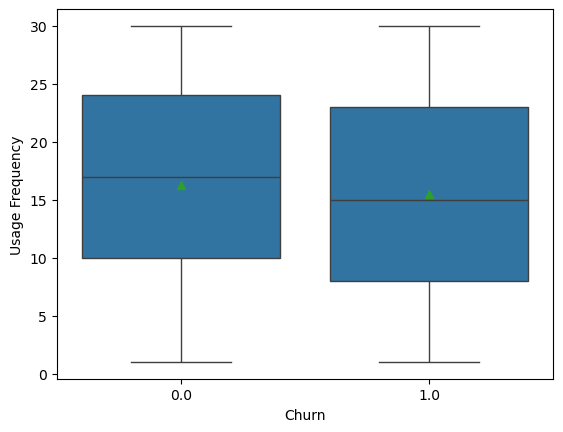

In [34]:
#kolom Usage Frequency
column = 'Usage Frequency'
sns.boxplot(x='Churn', y=column, data=train, showmeans=True)

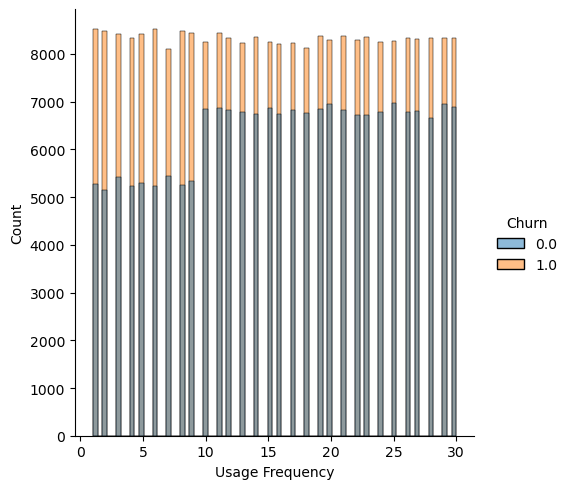

In [35]:
sns.displot(data=train, x=column, hue='Churn', common_norm=False, fill=True)

On average, customers who stay have slightly more usage frequency than customers who stop using the service.

<Axes: xlabel='Churn', ylabel='Support Calls'>

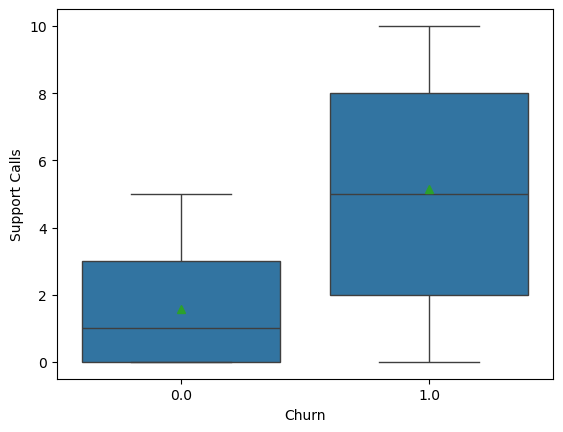

In [37]:
#kolom Support Calls
column = 'Support Calls'
sns.boxplot(x='Churn', y=column, data=train, showmeans=True)

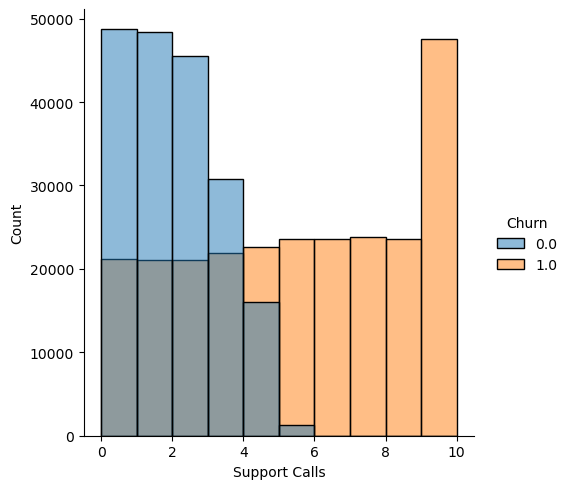

In [38]:
sns.displot(data=train, x=column, hue='Churn', common_norm=True, fill=True, bins=10)

It can be seen that for people who stopped using the service, the *support calls* made were numerous with the highest value at 10 calls. In contrast to people who continue to use the service, the majority use very few *support calls*. What is interesting about this is that there is a relationship between the number of support calls and the likelihood of customers to churn. The number of *support calls* could refer to poor service or complaints that have not been resolved in previous *support calls*.

<Axes: xlabel='Churn', ylabel='Payment Delay'>

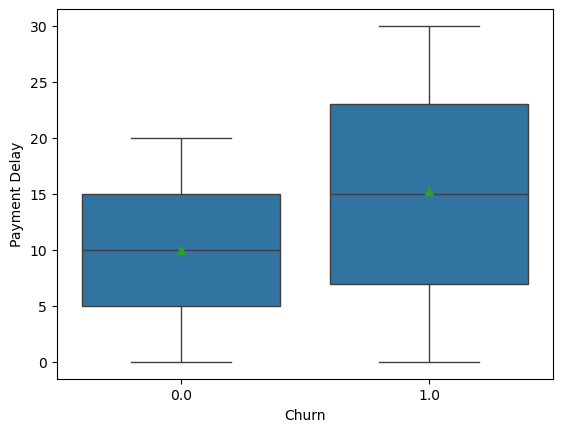

In [40]:
#kolom Payment Delay
column = 'Payment Delay'
sns.boxplot(x='Churn', y=column, data=train, showmeans=True)

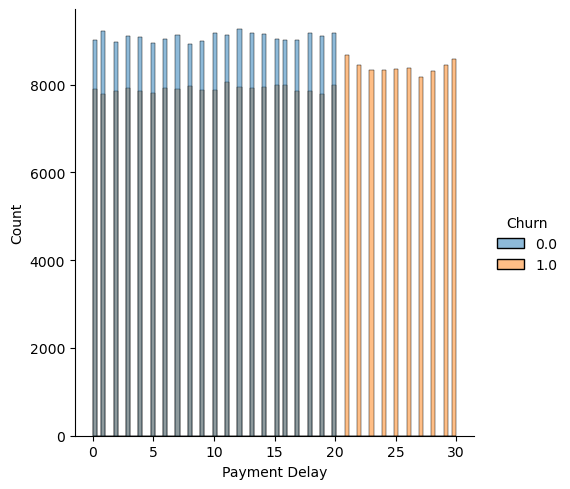

In [41]:
sns.displot(data=train, x=column, hue='Churn', common_norm=False, fill=True)

On average, it can be seen that customers who quit are more late in making payments than customers who stay.

<Axes: xlabel='Churn', ylabel='Total Spend'>

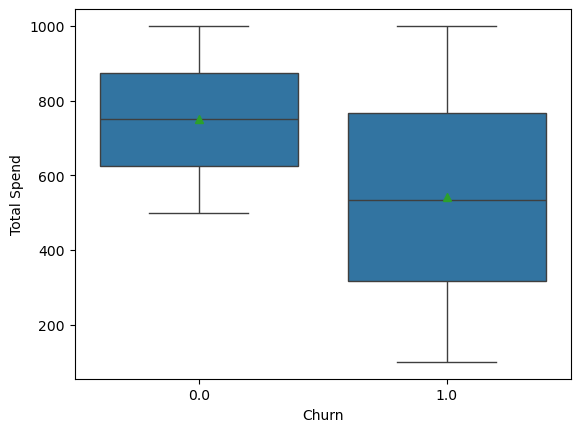

In [43]:
#kolom Total Spend
column = 'Total Spend'
sns.boxplot(x='Churn', y=column, data=train, showmeans=True)

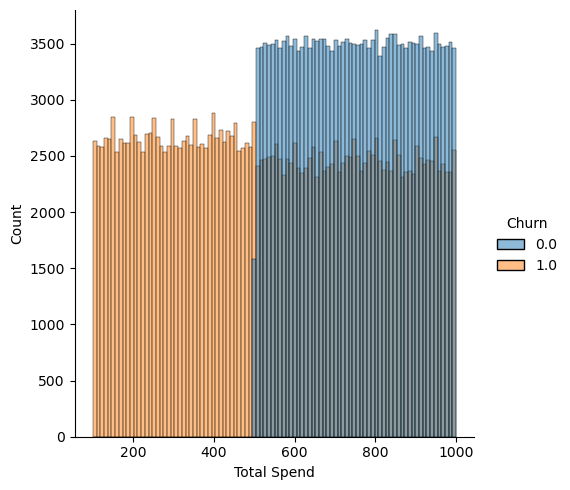

In [44]:
sns.displot(data=train, x=column, hue='Churn', common_norm=False, fill=True)

<Axes: xlabel='Churn', ylabel='Last Interaction'>

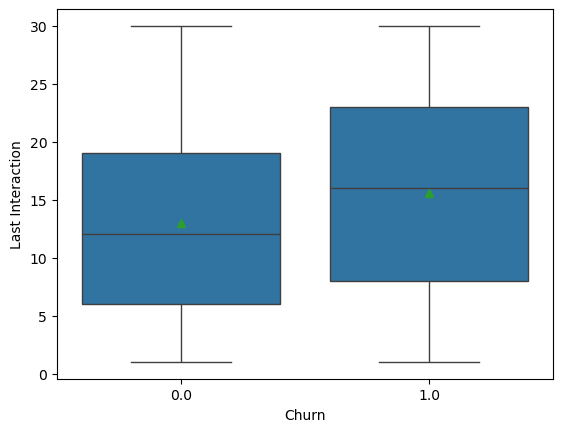

In [45]:
#kolom Last Interaction
column = 'Last Interaction'
sns.boxplot(x='Churn', y=column, data=train, showmeans=True)

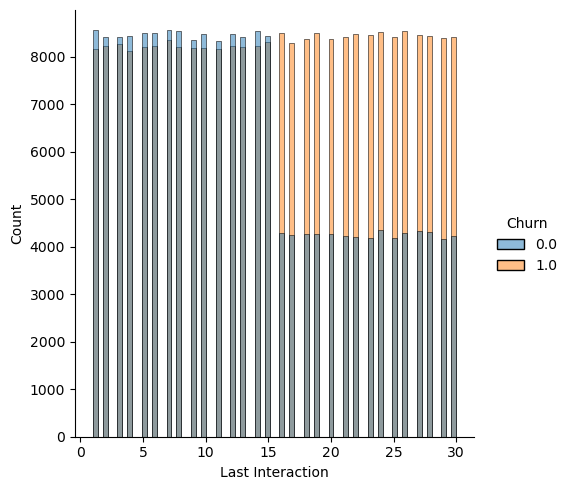

In [46]:
sns.displot(data=train, x=column, hue='Churn', common_norm=False, fill=True)

It can be seen that from the mean and median, customers who quit have a longer period of time from their last interaction with the service.

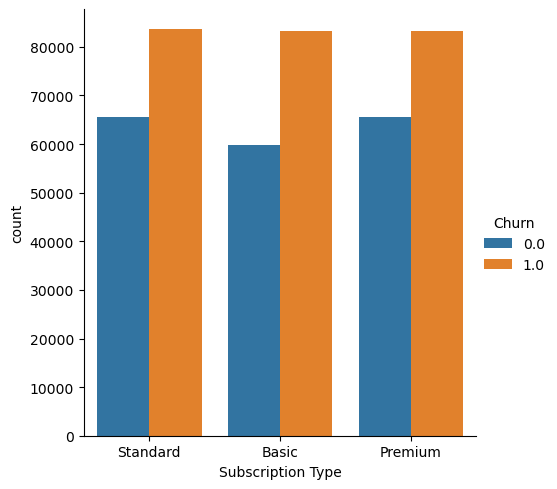

In [48]:
#Subscription Type
sns.catplot(data=train, x="Subscription Type", kind="count", hue='Churn')

In general, there is no significant relationship between subscription type and churn.

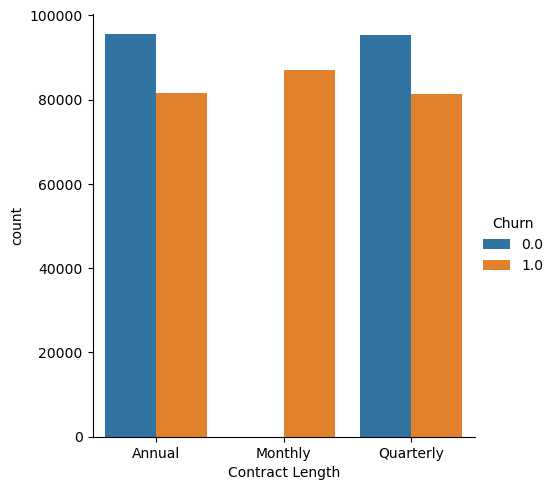

In [50]:
#Contract Length
sns.catplot(data=train, x="Contract Length", kind="count", hue='Churn')

# Feature Analysis

The `CustomerID` feature serves as an identifier so it will not be used for Machine Learning models.

In [53]:
train.drop(columns = ['CustomerID'], inplace=True)
test.drop(columns = ['CustomerID'],  inplace=True)

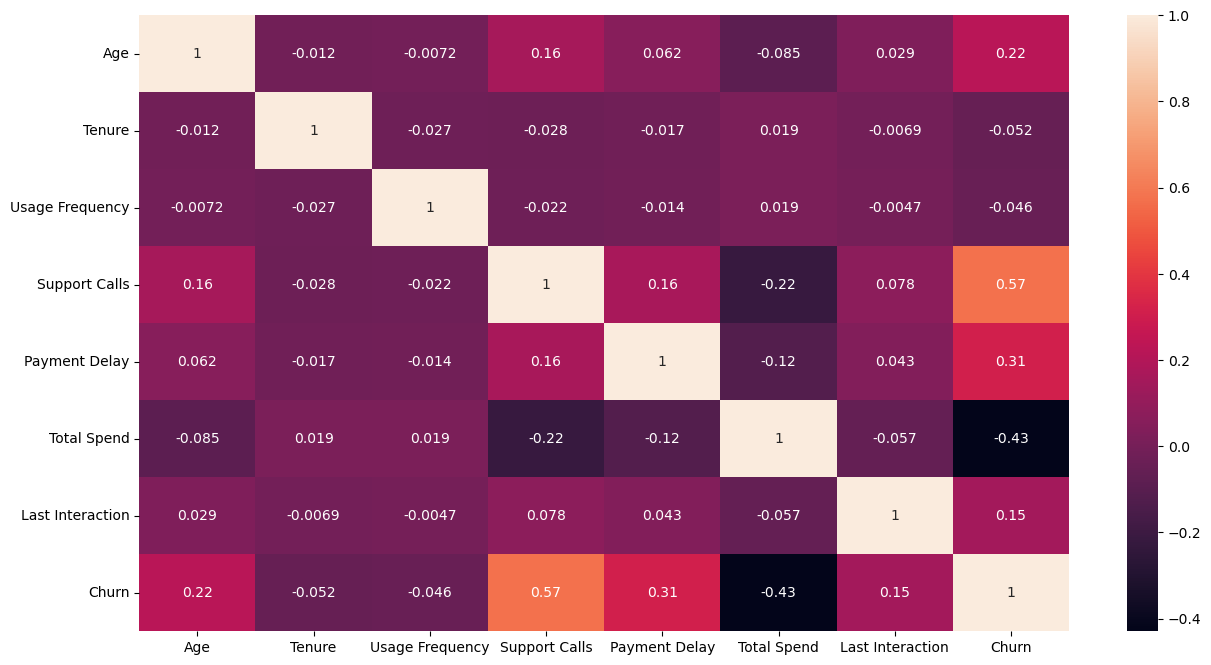

In [54]:
# corr = train.corr(numeric_only=True)
# sns.heatmap(corr, annot=True)

corr = train.corr(numeric_only=True)
plt.figure(figsize=(15,8))
ax = sns.heatmap(corr, annot=True)

From the heatmap, there are no features that have a strong correlation, either between predictor features and target features or between predictor features.

Most of the correlations are between -0.1 and 0.1. The largest correlation values are between `Churn` and `Support Calls` (0.57), `Churn` and `Total Spend` (-0.43) and `Churn` and `Payment Delay` (0.31).

Therefore, all features will be retained for the machine learning model.

Some category features that are strings or objects are converted to numeric. This is done to ensure the features can be used as input for machine learning models.

Features to be converted:
* `Gender` -> label encoding will be done with Male == 1 and Female == 0
* `Subscription Type` -> will be rank encoding with Basic == 0, Standard == 1 and Premium == 2
* `Contract Length` -> will be done label encoding with Quarterly == 0, Monthly == 1 and Annual == 2

In [57]:
train.replace({'Gender': {'Male': 1, 'Female':0}, 'Subscription Type': {'Basic':0, 'Standard':1, 'Premium':2}, 'Contract Length': {'Quarterly':0, 'Monthly':1, 'Annual':2}}, inplace=True)
test.replace({'Gender': {'Male': 1, 'Female':0}, 'Subscription Type': {'Basic':0, 'Standard':1, 'Premium':2}, 'Contract Length': {'Quarterly':0, 'Monthly':1, 'Annual':2}}, inplace=True)

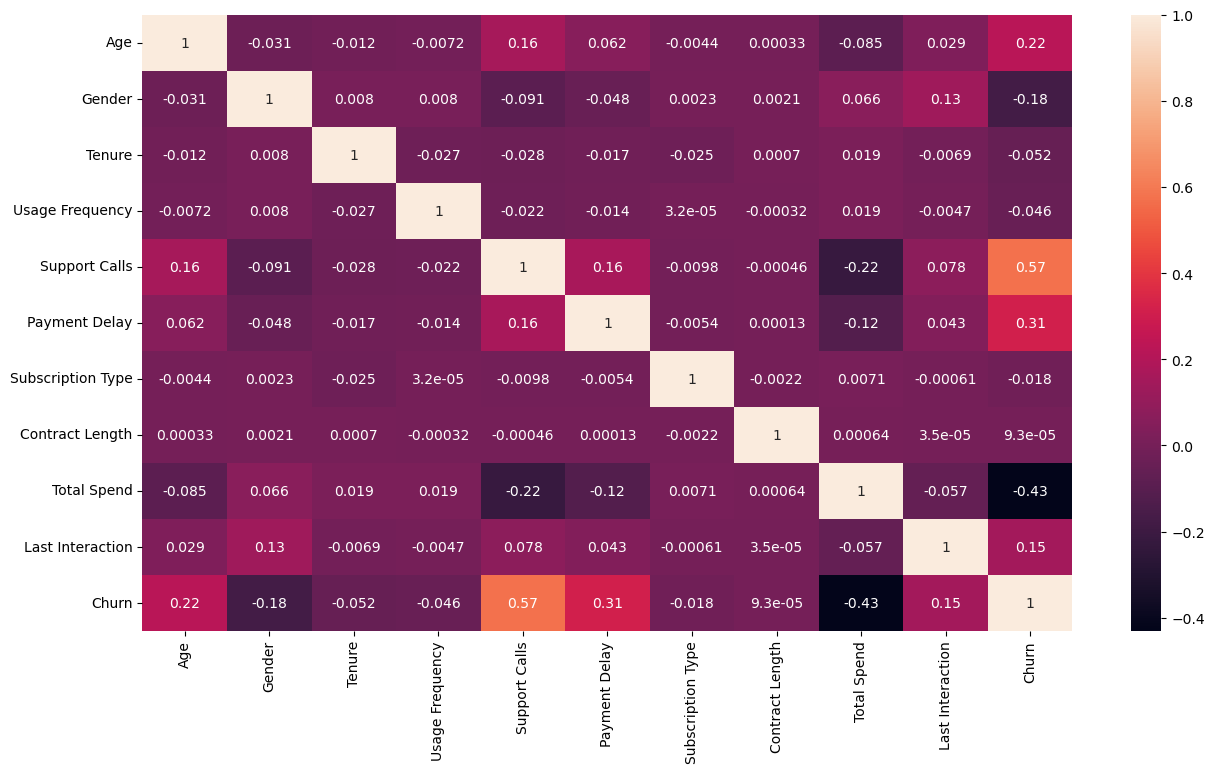

In [58]:
corr = train.corr(numeric_only=True)
plt.figure(figsize=(15,8))
ax = sns.heatmap(corr, annot=True)

# Modelling

For the Machine Learning model, 3 methods will be used:
* Logicstic Regression (LogReg)
* Random Forest (RF)
* XGBoost

These 3 models will be evaluated using F1 score, precision, recall, Confusion Matrix, AUC-ROC and PR-ROC with a focus on recall.

After modeling and evaluation, variations will be made to look at model performance (hyperparamater tuning and oversampling).

In [61]:
X_train = train.drop(columns=['Churn'])
y_train = train['Churn']
X_test = test.drop(columns=['Churn'])
y_test = test['Churn']

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Logistic Regression

In [64]:
logregbase = LogisticRegression()
logregbase.fit(X_train, y_train)
y_pred = logregbase.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logregbase.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.59


In [65]:
cf = confusion_matrix(y_test, y_pred)
print(cf)

[[ 7859 26022]
 [  559 29934]]


In [66]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve, auc

print(classification_report(y_test, y_pred))

#Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred)

# Print the ROC-AUC Score
print("ROC-AUC Score:", roc_auc)

# Calculate precision recall curve and PR AUC score
precision, recall,_= precision_recall_curve(y_test, y_pred)
pr_auc = auc(recall, precision)
# Print the PR-AUC Score
print("PR-AUC Score:", pr_auc)

              precision    recall  f1-score   support

           0       0.93      0.23      0.37     33881
           1       0.53      0.98      0.69     30493

    accuracy                           0.59     64374
   macro avg       0.73      0.61      0.53     64374
weighted avg       0.74      0.59      0.52     64374

ROC-AUC Score: 0.6068134194059539
PR-AUC Score: 0.7626537953544417


## Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier

# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100)

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

# performing predictions on the test dataset
y_pred = clf.predict(X_test)

In [69]:
cf = confusion_matrix(y_test, y_pred)
print(cf)

[[ 1962 31919]
 [   40 30453]]


In [70]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve, auc

print(classification_report(y_test, y_pred))

#Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred)

# Print the ROC-AUC Score
print("ROC-AUC Score:", roc_auc)

# Calculate precision recall curve and PR AUC score
precision, recall,_= precision_recall_curve(y_test, y_pred)
pr_auc = auc(recall, precision)
# Print the PR-AUC Score
print("PR-AUC Score:", pr_auc)

              precision    recall  f1-score   support

           0       0.98      0.06      0.11     33881
           1       0.49      1.00      0.66     30493

    accuracy                           0.50     64374
   macro avg       0.73      0.53      0.38     64374
weighted avg       0.75      0.50      0.37     64374

ROC-AUC Score: 0.5282983929238879
PR-AUC Score: 0.7437787620832986


## XGBoost

In [72]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

# make predictions for test data
y_pred = model.predict(X_test)

In [73]:
cf = confusion_matrix(y_test, y_pred)
print(cf)

[[ 1953 31928]
 [   39 30454]]


In [74]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve, auc

print(classification_report(y_test, y_pred))

#Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred)

# Print the ROC-AUC Score
print("ROC-AUC Score:", roc_auc)

# Calculate precision recall curve and PR AUC score
precision, recall,_= precision_recall_curve(y_test, y_pred)
pr_auc = auc(recall, precision)
# Print the PR-AUC Score
print("PR-AUC Score:", pr_auc)

              precision    recall  f1-score   support

           0       0.98      0.06      0.11     33881
           1       0.49      1.00      0.66     30493

    accuracy                           0.50     64374
   macro avg       0.73      0.53      0.38     64374
weighted avg       0.75      0.50      0.37     64374

ROC-AUC Score: 0.5281819723263154
PR-AUC Score: 0.7437562735918369


# Modelling with Oversampling

In [76]:
from sklearn.model_selection import train_test_split
# Split the data into training and validation sets
X_train_val, X_val, y_train_val, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [77]:
from imblearn.over_sampling import SMOTE
# Create an instance of SMOTE
sm = SMOTE(sampling_strategy=1.0, random_state=42)
# Fit and transform the training data
X_train_sm, y_train_sm = sm.fit_resample(X_train_val, y_train_val)

In [78]:
from sklearn.model_selection import RandomizedSearchCV

lr = LogisticRegression()
logistic_regression_param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

lgrg = RandomizedSearchCV(lr, logistic_regression_param_grid, cv = 3, scoring='recall')
lgrg.fit(X_train_sm, y_train_sm)

params = lgrg.best_params_
lr = LogisticRegression(**params)
lr.fit(X_train_sm, y_train_sm)
y_val_pred = lr.predict(X_val)
y_test_pred = lr.predict(X_test)
print(classification_report(y_val, y_val_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.89      0.84     38063
         1.0       0.90      0.83      0.86     50104

    accuracy                           0.85     88167
   macro avg       0.85      0.86      0.85     88167
weighted avg       0.86      0.85      0.85     88167

              precision    recall  f1-score   support

           0       0.92      0.26      0.41     33881
           1       0.54      0.97      0.70     30493

    accuracy                           0.60     64374
   macro avg       0.73      0.62      0.55     64374
weighted avg       0.74      0.60      0.54     64374



In [79]:
#Calculate ROC-AUC score
roc_auc_val = roc_auc_score(y_val, y_val_pred)
roc_auc_test = roc_auc_score(y_test, y_test_pred)

# Print the ROC-AUC Score
print("ROC-AUC Val Score:", roc_auc_val)
print("ROC-AUC Test Score:", roc_auc_test)

# Calculate precision recall curve and PR AUC score
precision_val, recall_val,_= precision_recall_curve(y_val, y_val_pred)
pr_auc_val = auc(recall_val, precision_val)
precision_test, recall_test,_= precision_recall_curve(y_test, y_test_pred)
pr_auc_test = auc(recall_test, precision_test)

# Print the PR-AUC Score
print("PR-AUC Val Score:", pr_auc_val)
print("PR-AUC Test Score:", pr_auc_test)

ROC-AUC Val Score: 0.8566891631766959
ROC-AUC Test Score: 0.617799595282248
PR-AUC Val Score: 0.9152964656399507
PR-AUC Test Score: 0.7646449073275492


In [ ]:
random_forest_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 8],
    'min_samples_leaf': [1, 2, 3]
}

clf = RandomForestClassifier()
rf = RandomizedSearchCV(clf, random_forest_param_grid, cv = 3, scoring='recall')
rf.fit(X_train_sm, y_train_sm)

params = rf.best_params_
clf = RandomForestClassifier(**params)
clf.fit(X_train_sm, y_train_sm)
y_val_pred = clf.predict(X_val)
y_test_pred = clf.predict(X_test)
print(classification_report(y_val, y_val_pred))
print(classification_report(y_test, y_test_pred))

In [ ]:
#Calculate ROC-AUC score
roc_auc_val = roc_auc_score(y_val, y_val_pred)
roc_auc_test = roc_auc_score(y_test, y_test_pred)

# Print the ROC-AUC Score
print("ROC-AUC Val Score:", roc_auc_val)
print("ROC-AUC Test Score:", roc_auc_test)

# Calculate precision recall curve and PR AUC score
precision_val, recall_val,_= precision_recall_curve(y_val, y_val_pred)
pr_auc_val = auc(recall_val, precision_val)
precision_test, recall_test,_= precision_recall_curve(y_test, y_test_pred)
pr_auc_test = auc(recall_test, precision_test)

# Print the PR-AUC Score
print("PR-AUC Val Score:", pr_auc_val)
print("PR-AUC Test Score:", pr_auc_val)

In [ ]:
xgboost_param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 1, 3]
}

model = XGBClassifier()

xgb = RandomizedSearchCV(model, xgboost_param_grid, cv = 3, scoring='recall')
xgb.fit(X_train_sm, y_train_sm)

params = xgb.best_params_
model = XGBClassifier(**params)
model.fit(X_train_sm, y_train_sm)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)
print(classification_report(y_val, y_val_pred))
print(classification_report(y_test, y_test_pred))

In [ ]:
#Calculate ROC-AUC score
roc_auc_val = roc_auc_score(y_val, y_val_pred)
roc_auc_test = roc_auc_score(y_test, y_test_pred)

# Print the ROC-AUC Score
print("ROC-AUC Val Score:", roc_auc_val)
print("ROC-AUC Test Score:", roc_auc_test)

# Calculate precision recall curve and PR AUC score
precision_val, recall_val,_= precision_recall_curve(y_val, y_val_pred)
pr_auc_val = auc(recall_val, precision_val)
precision_test, recall_test,_= precision_recall_curve(y_test, y_test_pred)
pr_auc_test = auc(recall_test, precision_test)

# Print the PR-AUC Score
print("PR-AUC Val Score:", pr_auc_val)
print("PR-AUC Test Score:", pr_auc_val)

# Key Insight & Recommendation

Some key insights & recommendations related to customers that can be provided:

* **`Support Calls` is something that needs to be a major concern.** This is because customers with a large number of support calls tend to stop using the service. The number of *support calls* can refer to poor service or complaints that have not been resolved in previous *support calls*. But further investigation is needed to ascertain whether the large number of support calls is due to poor company service, poor customer service or a combination of both.
* **Based on this, the recommended actions that need to be taken are to improve the quality of company services and improve the quality of customer service.** In order to be more focused and more certain of the main cause, it can be started first with a customer satisfaction survey on service and customer service.
* **Customers with the age of 40-50 years old are customers with a tendency to stay with the service.** Followed by customers aged 30-40 years.
* The subscription period between churn and non-churn customers is not much different. This indicates that **the length of subscription time does not guarantee that customers will be more loyal to the company's services.**
* **`Payment Delay` is also one of the things to predict customer churn.** This needs to be considered, is the payment delay caused by customers who are no longer interested in the service or difficult payment procedures?
* **3 Machine Learning methods used (Logistic Regression, Random Forest, and XGBoost) show great performance on predicting churned customer.** Logistic Regression have 98% recall (standard) and 97% recall (oversampling using SMOTE) Random Forest have 100% recall (standard) and 100% recall (oversampling using SMOTE). Logistic Regression have 100% recall (standard) and 100% recall (oversampling using SMOTE). It means **all three models predict over 95 churned customer out of 100 predicted churned customer.** The company can use one of the models to predict churned customers.